In [16]:
%pip -q install pandas

Note: you may need to restart the kernel to use updated packages.


In [17]:
import os
import pandas as pd

# Define the folder containing the jsonl files
folder_path = './metrics'

# List all files in the directory
files = [f for f in os.listdir(folder_path) if f.endswith('.jsonl')]

# Initialize an empty list to hold DataFrames
data_frames = []

# Loop through the list of files and read each jsonl file
for file in files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_json(file_path, lines=True)
    data_frames.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(data_frames, ignore_index=True)

# Display the combined DataFrame
combined_df.head()


,key,value,_time,_id,_implementation
0,test_insert_duration_ms_100,42.0,2024-07-13 22:54:55.172945976,a3238eb6-5374-4e4a-bd8c-f6db7378d44b,example
1,test_insert_100,0.0,2024-07-13 22:54:55.172956467,a3238eb6-5374-4e4a-bd8c-f6db7378d44b,example
2,test_insert_duration_ms_100,41.0,2024-07-13 22:54:55.264714241,a3238eb6-5374-4e4a-bd8c-f6db7378d44b,example
3,test_insert_100,100.0,2024-07-13 22:54:55.264720678,a3238eb6-5374-4e4a-bd8c-f6db7378d44b,example
4,test_insert_duration_ms_100,51.0,2024-07-13 22:54:55.376498461,a3238eb6-5374-4e4a-bd8c-f6db7378d44b,example


In [18]:
# Set the display option to print all rows
pd.set_option('display.max_rows', None)

# Set the display option to print all columns
pd.set_option('display.max_columns', None)

mask = combined_df['key'].str.contains('insert_duration')
pd.DataFrame(combined_df[mask].groupby(by=["_id","_implementation","key"])["value"].sum()).sort_values(by=["_implementation", "_id"])

value
_id                                  _implementation key                                   
21a85b8f-605c-4523-9551-29a5920c34ab example         test_insert_duration_ms_100    50335.0
                                                     test_insert_duration_ms_1000   35542.0
                                                     test_insert_duration_ms_10000  36789.0
                                                     test_insert_duration_ms_2000   34836.0
                                                     test_insert_duration_ms_20000  35825.0
                                                     test_insert_duration_ms_4000   32278.0
                                                     test_insert_duration_ms_500    36011.0
a3238eb6-5374-4e4a-bd8c-f6db7378d44b example         test_insert_duration_ms_100    53422.0
                                                     test_insert_duration_ms_1000   38561.0
                                                     test_insert_duration_ms_10000  37194.0
                                                     test_insert_duration_ms_2000   41070.0
                                                     test_insert_duration_ms_20000  40120.0
                                                     test_insert_duration_ms_4000   36136.0
                                                     test_insert_duration_ms_500    36368.0
c6c3ece5-1472-4e3f-8b1a-3f09f2aae790 example         test_insert_duration_ms_100    47607.0
                                                     test_insert_duration_ms_1000   27568.0
                                                     test_insert_duration_ms_10000  30647.0
                                                     test_insert_duration_ms_2000   31388.0
                                                     test_insert_duration_ms_20000  34268.0
                                                     test_insert_duration_ms_4000   27665.0
                                                     test_insert_duration_ms_500    30987.0
2ae68537-622c-4d6e-90f1-2d1e8bad70bb example2        test_insert_duration_ms_100    48146.0
                                                     test_insert_duration_ms_1000   28956.0
                                                     test_insert_duration_ms_10000  22290.0
                                                     test_insert_duration_ms_2000   29690.0
                                                     test_insert_duration_ms_20000  21801.0
                                                     test_insert_duration_ms_4000   24507.0
                                                     test_insert_duration_ms_500    33367.0
4fa8bd5b-e953-4f3e-8191-5b4b4639d2c8 example2        test_insert_duration_ms_100    46649.0
                                                     test_insert_duration_ms_1000   28252.0
                                                     test_insert_duration_ms_10000  22461.0
                                                     test_insert_duration_ms_2000   29704.0
                                                     test_insert_duration_ms_20000  20570.0
                                                     test_insert_duration_ms_4000   25406.0
                                                     test_insert_duration_ms_500    34785.0
e1ac5713-0015-4f4a-8fb7-e0fe6205f0b5 example2        test_insert_duration_ms_100    53543.0
                                                     test_insert_duration_ms_1000   35024.0
                                                     test_insert_duration_ms_10000  25699.0
                                                     test_insert_duration_ms_2000   28448.0
                                                     test_insert_duration_ms_20000  26194.0
                                                     test_insert_duration_ms_4000   26419.0
                                                     test_insert_duration_ms_500    36087.0
044fb2fb-2759-4ce7-a0a4-8a57fe039326 n

In [19]:
mask = combined_df['key'].str.contains('insert_duration')
pd.DataFrame(combined_df[mask].groupby(by=["_id","_implementation","key"])["value"].mean()).sort_values(by=["_implementation", "_id"])

value
_id                                  _implementation key                                    
21a85b8f-605c-4523-9551-29a5920c34ab example         test_insert_duration_ms_100      50.335
                                                     test_insert_duration_ms_1000    355.420
                                                     test_insert_duration_ms_10000  3678.900
                                                     test_insert_duration_ms_2000    696.720
                                                     test_insert_duration_ms_20000  7165.000
                                                     test_insert_duration_ms_4000   1291.120
                                                     test_insert_duration_ms_500     180.055
a3238eb6-5374-4e4a-bd8c-f6db7378d44b example         test_insert_duration_ms_100      53.422
                                                     test_insert_duration_ms_1000    385.610
                                                     test_insert_duration_ms_10000  3719.400
                                                     test_insert_duration_ms_2000    821.400
                                                     test_insert_duration_ms_20000  8024.000
                                                     test_insert_duration_ms_4000   1445.440
                                                     test_insert_duration_ms_500     181.840
c6c3ece5-1472-4e3f-8b1a-3f09f2aae790 example         test_insert_duration_ms_100      47.607
                                                     test_insert_duration_ms_1000    275.680
                                                     test_insert_duration_ms_10000  3064.700
                                                     test_insert_duration_ms_2000    627.760
                                                     test_insert_duration_ms_20000  6853.600
                                                     test_insert_duration_ms_4000   1106.600
                                                     test_insert_duration_ms_500     154.935
2ae68537-622c-4d6e-90f1-2d1e8bad70bb example2        test_insert_duration_ms_100      48.146
                                                     test_insert_duration_ms_1000    289.560
                                                     test_insert_duration_ms_10000  2229.000
                                                     test_insert_duration_ms_2000    593.800
                                                     test_insert_duration_ms_20000  4360.200
                                                     test_insert_duration_ms_4000    980.280
                                                     test_insert_duration_ms_500     166.835
4fa8bd5b-e953-4f3e-8191-5b4b4639d2c8 example2        test_insert_duration_ms_100      46.649
                                                     test_insert_duration_ms_1000    282.520
                                                     test_insert_duration_ms_10000  2246.100
                                                     test_insert_duration_ms_2000    594.080
                                                     test_insert_duration_ms_20000  4114.000
                                                     test_insert_duration_ms_4000   1016.240
                                                     test_insert_duration_ms_500     173.925
e1ac5713-0015-4f4a-8fb7-e0fe6205f0b5 example2        test_insert_duration_ms_100      53.543
                                                     test_insert_duration_ms_1000    350.240
                                                     test_insert_duration_ms_10000  2569.900
                                                     test_insert_duration_ms_2000    568.960
                                                     test_insert_duration_ms_20000  5238.800
                                                     test_insert_duration_ms_4000   1056.760
                                                     test_insert_duration_ms_500     180

In [20]:
import pandas as pd

# Assuming combined_df is already defined and contains the necessary data

# Step 1: Create a mask to filter rows where 'key' contains 'insert_duration'
mask = combined_df['key'].str.contains('insert_duration')

# Step 2: Filter the DataFrame using the mask
filtered_df = combined_df[mask]

# Step 3: Group by '_id', '_implementation', and 'key', then calculate the mean of 'value'
grouped_df = filtered_df.groupby(by=["_id", "_implementation", "key"])["value"].mean().reset_index()

# Step 4: Pivot the DataFrame to make 'key' values as columns
pivot_df = grouped_df.pivot_table(index=['_id', '_implementation'], columns='key', values='value').reset_index()

# Step 5: Flatten the MultiIndex columns
pivot_df.columns.name = None
pivot_df.columns = [f'{col}' if col not in ['_id', '_implementation'] else col for col in pivot_df.columns]

# Display the result
pivot_df


,_id,_implementation,test_insert_duration_ms_100,test_insert_duration_ms_1000,test_insert_duration_ms_10000,test_insert_duration_ms_2000,test_insert_duration_ms_20000,test_insert_duration_ms_4000,test_insert_duration_ms_500
0,044fb2fb-2759-4ce7-a0a4-8a57fe039326,normie,95.233,455.69,3237.5,830.38,6297.0,1557.60,268.710
1,134b7978-3a9f-4ae6-bc80-765be10b32d4,normie,96.432,453.72,3168.8,846.22,6440.2,1504.56,268.555
2,21a85b8f-605c-4523-9551-29a5920c34ab,example,50.335,355.42,3678.9,696.72,7165.0,1291.12,180.055
3,2ae68537-622c-4d6e-90f1-2d1e8bad70bb,example2,48.146,289.56,2229.0,593.80,4360.2,980.28,166.835
4,4fa8bd5b-e953-4f3e-8191-5b4b4639d2c8,example2,46.649,282.52,2246.1,594.08,4114.0,1016.24,173.925
5,81ab09e6-d227-4144-bea9-3473297e6117,normie,94.325,445.33,3121.0,882.68,6456.6,1463.80,262.065
6,a3238eb6-5374-4e4a-bd8c-f6db7378d44b,example,53.422,385.61,3719.4,821.40,8024.0,1445.44,181.840
7,c6c3ece5-1472-4e3f-8b1a-3f09f2aae790,example,47.607,275.68,3064.7,627.76,6853.6,1106.60,154.935
8,e1ac5713-0015-4f4a-8fb7-e0fe6205f0b5,example2,53.543,350.24,2569.9,568.96,5238.8,1056.76,180.435


In [21]:
mask = combined_df['key'].str.contains('insert_duration')
df_avg_insert = pd.DataFrame(combined_df[mask].groupby(by=["_id","_implementation","key"])["value"].mean()).reset_index()
df_avg_insert["batch_size"] = [int(k.split("test_insert_duration_ms_")[1]) for k in df_avg_insert.key.values]
df_avg_insert["imp_run"] = df_avg_insert._implementation + "-" + df_avg_insert._id.str[-4:] 
df_avg_insert.rename(columns={"value":"avg_insert_duration_ms"}, inplace=True)
df_avg_insert.drop("key", axis=1, inplace=True)
df_avg_insert.head()

,_id,_implementation,avg_insert_duration_ms,batch_size,imp_run
0,044fb2fb-2759-4ce7-a0a4-8a57fe039326,normie,95.233,100,normie-9326
1,044fb2fb-2759-4ce7-a0a4-8a57fe039326,normie,455.690,1000,normie-9326
2,044fb2fb-2759-4ce7-a0a4-8a57fe039326,normie,3237.500,10000,normie-9326
3,044fb2fb-2759-4ce7-a0a4-8a57fe039326,normie,830.380,2000,normie-9326
4,044fb2fb-2759-4ce7-a0a4-8a57fe039326,normie,6297.000,20000,normie-9326


Note: you may need to restart the kernel to use updated packages.


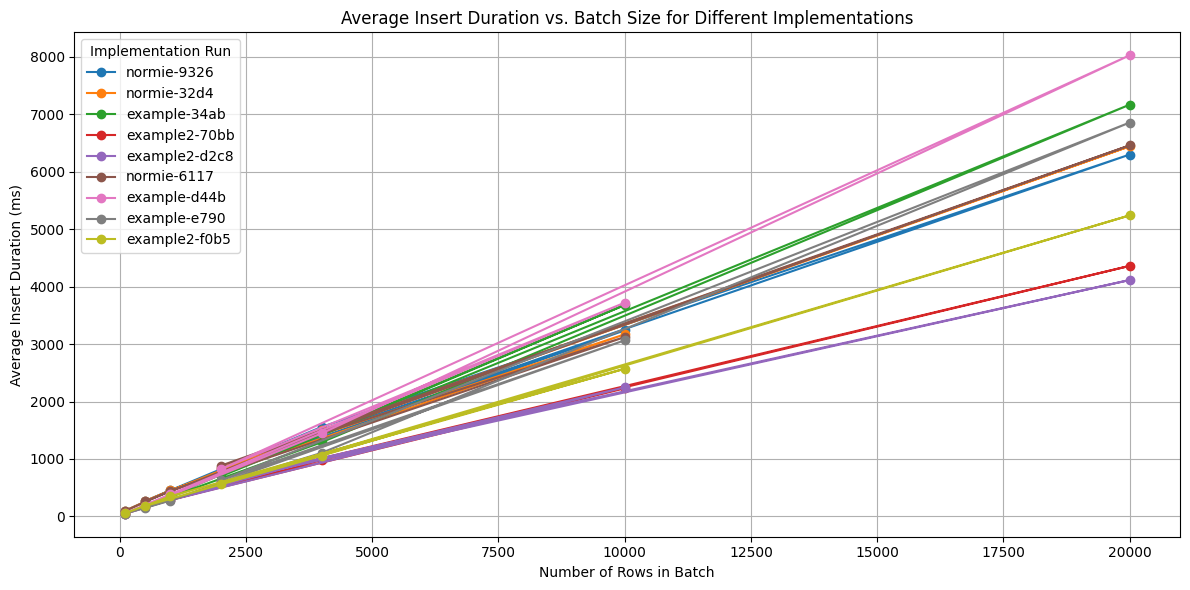

In [22]:
%pip install -q matplotlib
import matplotlib.pyplot as plt  

# Plotting
plt.figure(figsize=(12, 6))

# Iterate over each unique imp_run to plot a separate line
imp_runs = df_avg_insert['imp_run'].unique()
for imp_run in imp_runs:
    subset = df_avg_insert[df_avg_insert['imp_run'] == imp_run]
    plt.plot(subset['batch_size'], subset['avg_insert_duration_ms'], marker='o', linestyle='-', label=imp_run)

# Set labels and title
plt.xlabel('Number of Rows in Batch')
plt.ylabel('Average Insert Duration (ms)')
plt.title('Average Insert Duration vs. Batch Size for Different Implementations')
plt.legend(title='Implementation Run')

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
%pip install -q plotly nbformat 
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Create an empty figure
fig = go.Figure()

# Iterate over each unique imp_run to plot a separate line
imp_runs = df_avg_insert['imp_run'].unique()
for imp_run in imp_runs:
    subset = df_avg_insert[df_avg_insert['imp_run'] == imp_run]
    fig.add_trace(go.Scatter(
        x=subset['batch_size'],
        y=subset['avg_insert_duration_ms'],
        mode='lines+markers',
        name=imp_run
    ))

# Set labels and title
fig.update_layout(
    title='Average Insert Duration vs. Batch Size for Different Implementations',
    xaxis_title='Number of Rows in Batch',
    yaxis_title='Average Insert Duration (ms)',
    legend_title='Implementation Run',
    template='plotly_white'
)

# Show grid
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

# Show the plot
fig.show()


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.
min 0 0.38823529411764707
max 45965 5.0194117647058825
avg 5292.039611


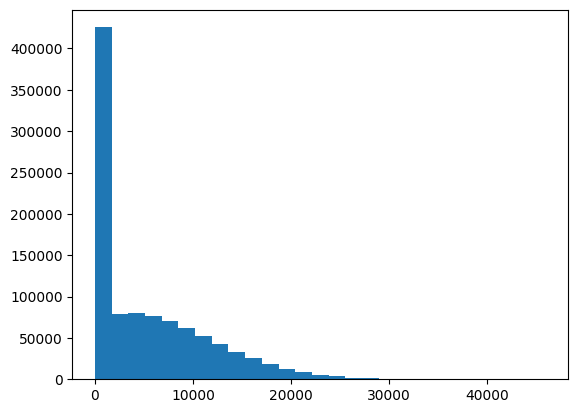

In [8]:
%pip install -q matplotlib

import random  
import matplotlib.pyplot as plt  

def yield_gauss(mu, sigma, min_value, max_value):
    while True:
        num = int(round(random.gauss(mu, sigma),0))
        # yield min value if lower
        # keep trying until num is between min & max value
        if num <= min_value:
            yield min_value
        elif min_value <= num <= max_value:
            yield num

# Parameters
mu = 3300
sigma = 8500
min_value = 0 # 700
max_value = 200000 # 1300

# Generate numbers using the yieldable function
nums = []
gauss_gen = yield_gauss(mu, sigma, min_value, max_value)
for _ in range(1_000_000):
    nums.append(int(next(gauss_gen)))

print("min", min(nums), abs(mu - min(nums)) / sigma)
print("max", max(nums), abs(mu - max(nums)) / sigma)
print("avg", sum(nums) / len(nums))
# Plotting a graph
plt.hist(nums, bins=27)
plt.show()